# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 15)

## Reading data

In [3]:
X_train = pd.read_csv(os.path.join("..", "data", "AMF_train_X.csv"))
y_train = pd.read_csv(os.path.join("..", "data", "AMF_train_Y.csv"))
Xy_train = X_train.merge(y_train, how="inner", on=["Trader"])
Xy_train.drop(['Index'], axis=1, inplace=True)

In [4]:
X_test = pd.read_csv(os.path.join("..", "data", "AMF_test_X.csv"))

## Basic features

### Dtype of features and number of records

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105782 entries, 0 to 105781
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Index                       105782 non-null  int64  
 1   Share                       105782 non-null  object 
 2   Day                         105782 non-null  object 
 3   Trader                      105782 non-null  object 
 4   OTR                         104099 non-null  float64
 5   OCR                         105782 non-null  float64
 6   OMR                         58170 non-null   float64
 7   min_time_two_events         105782 non-null  float64
 8   mean_time_two_events        105782 non-null  float64
 9   10_p_time_two_events        105782 non-null  float64
 10  med_time_two_events         105782 non-null  float64
 11  25_p_time_two_events        105782 non-null  float64
 12  75_p_time_two_events        105782 non-null  float64
 13  90_p_time_two_

In [6]:
X_train.describe()

,Index,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
count,105782.000000,104099.000000,105782.000000,58170.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,...,80606.000000,80606.000000,80606.000000,80527.000000,80527.000000,80527.000000,80634.000000,80634.000000,80634.000000,105782.000000
mean,52891.500000,34.435038,17.458787,164.469153,87.472164,2772.513578,103.310102,1011.630575,228.659560,4734.942457,...,297.616104,598.637740,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,334.034070
std,30536.777425,137.261154,71.843225,929.010848,1549.972501,4985.149536,1617.051421,4967.426924,2319.866837,10431.964706,...,1882.353978,2010.296401,1896.835552,1922.648030,2031.797111,1933.073024,1910.028651,2037.041672,1923.023720,644.816702
min,1.000000,1.044444,2.000000,1.001960,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,...,0.000001,0.000002,0.000001,0.000001,0.000003,0.000002,0.000001,0.000008,0.000003,1.000000
25%,26446.250000,3.709023,2.753802,3.253655,0.000000,69.365666,0.000000,1.243868,0.000024,22.249021,...,0.000005,33.819189,2.533583,0.000006,32.699571,2.305276,0.000020,33.713187,2.639113,24.000000
50%,52891.500000,7.346154,4.789474,14.000000,0.000000,262.325253,0.000109,10.154920,0.093957,114.957445,...,0.000232,110.427370,22.413161,0.000260,111.633327,23.665962,0.000270,113.158721,23.435835,97.000000
75%,79336.750000,22.707956,16.366667,73.689116,0.000000,3801.273320,0.020739,60.552090,2.836749,2277.450350,...,0.008000,367.974973,121.244211,0.051880,376.874393,127.408500,0.059669,380.865913,128.108940,342.000000
max,105782.000000,17561.000000,14409.000000,127861.000000,52568.766000,52568.765625,52568.766000,52568.766000,52568.766000,60597.414000,...,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,12966.000000


### NAs

In [7]:
share_of_nas = X_train.isna().sum() / len(X_train)
na_columns = X_train.columns[X_train.isna().any()].tolist()
print(f"The columns containing NAs are:\n{share_of_nas[share_of_nas != 0]}")

The columns containing NAs are:
OTR                0.015910
OMR                0.450095
min_dt_TV1         0.040035
mean_dt_TV1        0.040035
med_dt_TV1         0.040035
min_dt_TV1_TV2     0.237999
mean_dt_TV1_TV2    0.237999
med_dt_TV1_TV2     0.237999
min_dt_TV1_TV3     0.238746
mean_dt_TV1_TV3    0.238746
med_dt_TV1_TV3     0.238746
min_dt_TV1_TV4     0.237734
mean_dt_TV1_TV4    0.237734
med_dt_TV1_TV4     0.237734
dtype: float64


### Balance of the dataset

In [8]:
y_train.groupby(["type"]).count()

,Trader
type,
HFT,15
MIX,24
NON HFT,47


## Linear Correlations between features

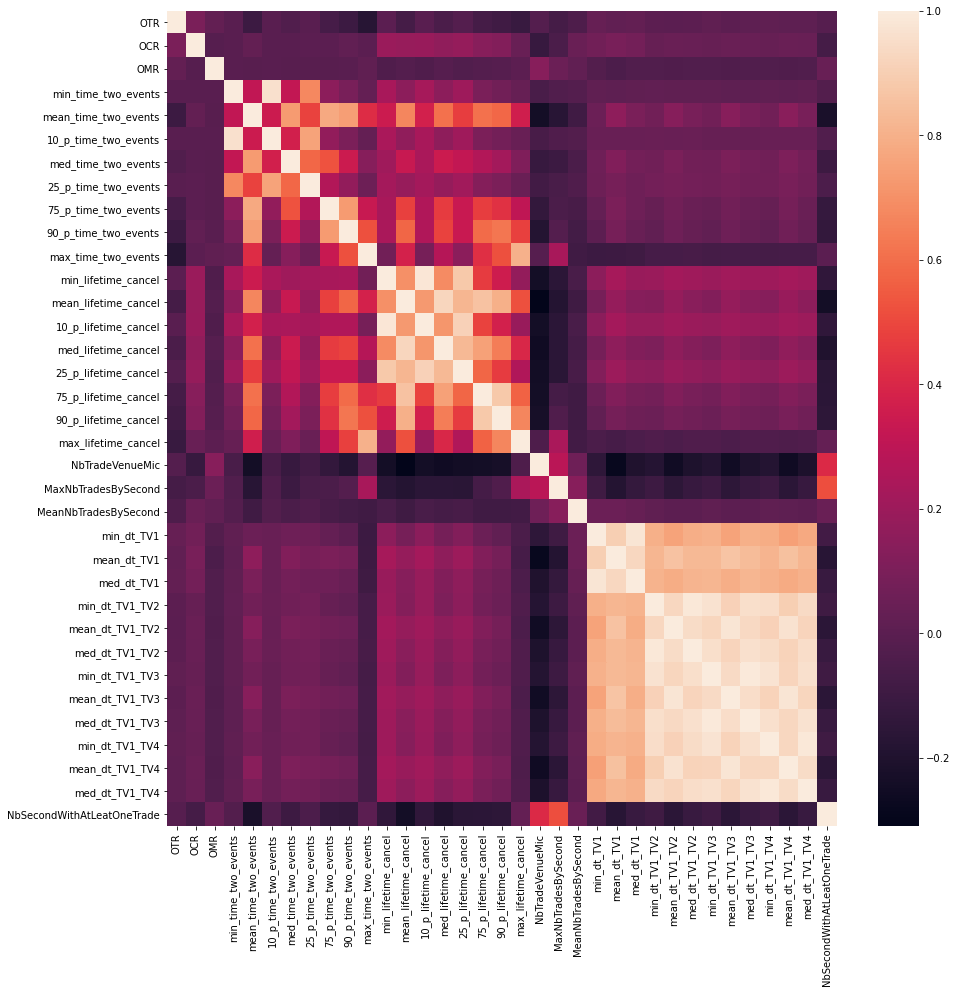

In [9]:
corr = Xy_train.corr()
sns.heatmap(corr);

In [10]:
def corr_above_threshold(corr, threshold=0.9):
    corr_threshold = corr.mask((corr < threshold) | (corr == 1.0), 0)
    mask = np.triu(np.ones_like(corr_threshold, dtype=bool))
    sns.heatmap(corr_threshold, mask=mask)

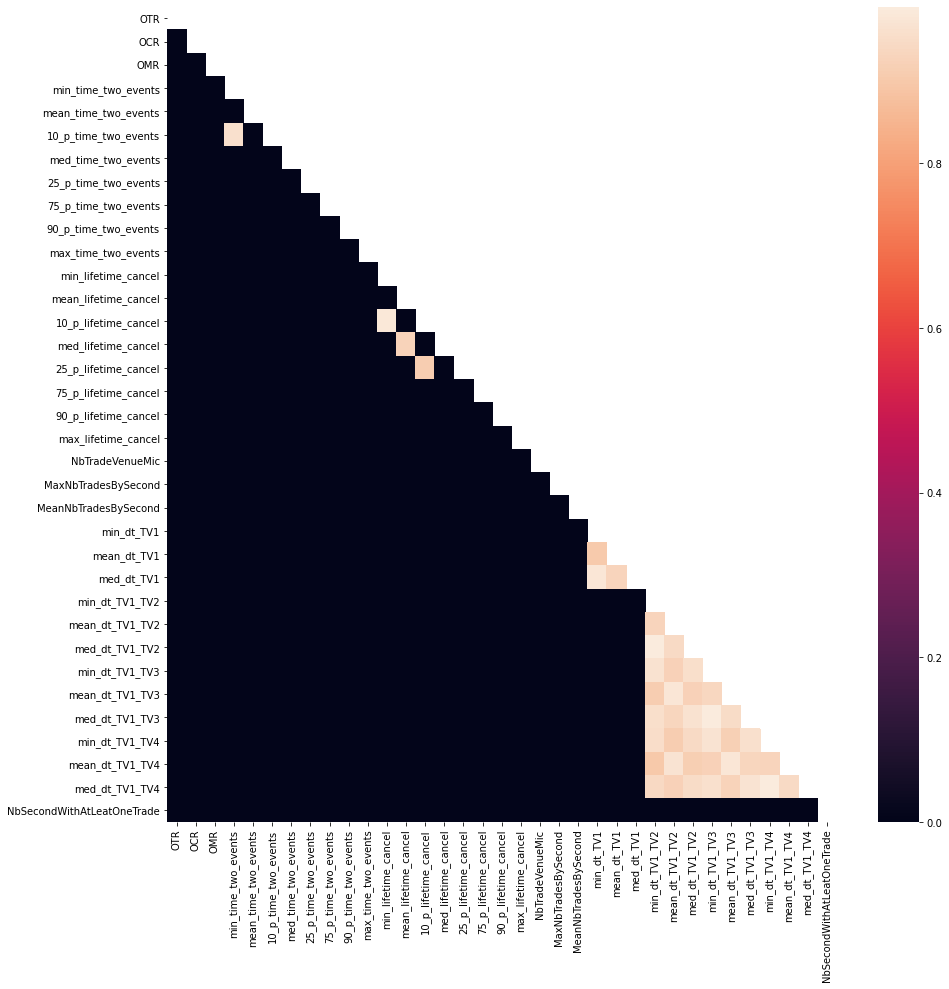

In [11]:
corr_above_threshold(corr, threshold=0.9)

## Normalizing features

In [12]:
OTR_ratio = 1 / 2.272727
OCR_ratio = 1 / 8.333333
OMR_ratio = 1 / 12.500000
total = OTR_ratio + OCR_ratio + OMR_ratio
OTR_ratio /= total
OCR_ratio /= total
OMR_ratio /= total
print(OTR_ratio)
print(OCR_ratio)
print(OMR_ratio)
print(OTR_ratio + OCR_ratio + OMR_ratio)

0.687500020625001
0.18749999062499925
0.12499998874999976
1.0


In [13]:
def normalize_events(X):
    
    X_transformed = X.copy()
    mask_OTR = X_transformed['OTR'].isna()
    mask_OCR = X_transformed['OCR'].isna()
    mask_OMR = X_transformed['OMR'].isna()
    X_transformed.loc[mask_OTR, 'OTR'] = 0
    X_transformed.loc[mask_OCR, 'OCR'] = 0
    X_transformed.loc[mask_OMR, 'OMR'] = 0
    X_transformed.loc[~mask_OTR, 'OTR'] = 1 / X_transformed['OTR']
    X_transformed.loc[~mask_OCR, 'OCR'] = 1 / X_transformed['OCR']
    X_transformed.loc[~mask_OMR, 'OMR'] = 1 / X_transformed['OMR']
    X_transformed['total'] = X_transformed['OTR'] + X_transformed['OCR'] + X_transformed['OMR']
    X_transformed['OTR'] /=  X_transformed['total']
    X_transformed['OCR'] /=  X_transformed['total']
    X_transformed['OMR'] /=  X_transformed['total']
    X_transformed.drop(['total'], inplace=True, axis=1)
    return X_transformed

In [14]:
normalizer = FunctionTransformer(normalize_events)

In [15]:
pipe = make_pipeline(normalizer)
X_train = pipe.fit_transform(X_train, y_train)

In [16]:
na_columns = X_train.columns[X_train.isna().any()].tolist()[3:]
X_train_no_na = X_train.drop(na_columns, axis=1, inplace=False)
X_train_no_na.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,0.687500,0.187500,0.125000,0.0,5117.830300,0.000000,...,23151.83800,23151.8380,23151.838,1,7,2.750000,351.702399,9639.216031,1585.079495,4
1,2,Isin_87,Date_29,Trader_10,0.872549,0.058824,0.068627,0.0,1846.968401,0.000074,...,808.26230,21433.6840,21433.684,1,17,5.933333,0.000066,493.559196,0.000901,15
2,3,Isin_87,Date_23,Trader_10,0.957958,0.030030,0.012012,0.0,686.300630,0.000071,...,418.23984,1953.6235,10842.464,1,20,5.063492,0.000018,163.954785,0.000770,63
3,4,Isin_12,Date_11,Trader_10,0.850000,0.100000,0.050000,0.0,2174.335265,0.000000,...,19187.71900,19187.7190,19187.719,1,8,4.250000,0.000148,1232.562133,0.004301,4
4,5,Isin_87,Date_9,Trader_10,0.946309,0.053691,0.000000,0.0,944.008551,0.000071,...,21903.78300,23164.5140,23164.514,1,19,3.710526,0.000025,248.073927,0.001364,38


In [17]:
Xy_train = X_train_no_na.merge(y_train, on=['Trader'])
Xy_train.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade,type
0,1,Isin_8,Date_24,Trader_10,0.687500,0.187500,0.125000,0.0,5117.830300,0.000000,...,23151.8380,23151.838,1,7,2.750000,351.702399,9639.216031,1585.079495,4,NON HFT
1,2,Isin_87,Date_29,Trader_10,0.872549,0.058824,0.068627,0.0,1846.968401,0.000074,...,21433.6840,21433.684,1,17,5.933333,0.000066,493.559196,0.000901,15,NON HFT
2,3,Isin_87,Date_23,Trader_10,0.957958,0.030030,0.012012,0.0,686.300630,0.000071,...,1953.6235,10842.464,1,20,5.063492,0.000018,163.954785,0.000770,63,NON HFT
3,4,Isin_12,Date_11,Trader_10,0.850000,0.100000,0.050000,0.0,2174.335265,0.000000,...,19187.7190,19187.719,1,8,4.250000,0.000148,1232.562133,0.004301,4,NON HFT
4,5,Isin_87,Date_9,Trader_10,0.946309,0.053691,0.000000,0.0,944.008551,0.000071,...,23164.5140,23164.514,1,19,3.710526,0.000025,248.073927,0.001364,38,NON HFT


## Conditional means

In [18]:
groupby = Xy_train.groupby('type').mean()#.describe()
# groupby.T.to_csv('data/groupby_train_describe.csv')
groupby.T

type,HFT,MIX,NON HFT
Index,49459.891111,58014.898161,45995.083896
OTR,0.179486,0.401327,0.665265
OCR,0.718917,0.403294,0.201569
OMR,0.101597,0.195379,0.133166
min_time_two_events,26.420229,4.523716,365.831119
mean_time_two_events,2405.036768,1186.684492,6950.961064
10_p_time_two_events,31.747568,6.210128,429.294303
med_time_two_events,1093.533115,100.445380,2993.543020
25_p_time_two_events,102.058522,13.599811,905.057796
75_p_time_two_events,4676.172604,2519.533030,9922.361149
